#  Сборный проект

 Цели: 
 - из открытых источников понять и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


# Комментарий от наставника

Привет, спасибо, что выполнил проект, я буду оставлять комментарии по ходу работы, если они у меня появятся)

In [1]:
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rc
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение.
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games = pd.read_csv('/datasets/games.csv',  sep=',')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовьте данные

In [4]:
# Замените названия столбцов (приведите к нижнему регистру);
games.columns = map(str.lower, games.columns)

# Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
games['name'] = games['name'].fillna('None')
#games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)
games['genre'] = games['genre'].fillna('None')
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna('None')

# Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

games['user_score'] = games['user_score'].replace(to_replace ='tbd', value = 0).astype(float)

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
📝 
* Что касается name, year_of_release, genre, то доля пропусков здесь менее 5% и для экономии времени их можно удалить.
    
* critic_score, user_score вариант допустимый, но потенциально может привести к проблемам при анализе влияния отзывов на продажи, нужно отследить это.
    
* rating - верное решение.
</div>

 <font color = 'green'> TBD - сокращение от "To Be Determined" (требуется уточнение). Это значение в столбце User_Score означает, что у игры меньше 4-ех оценок.  https://www.metacritic.com/faq#item13

Будем считать, что в случае с tbd, user_score равен 0.
 </font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 Верно, `tbd` означает `To Be Determined`, т.к. игра ещё не выпущена. Тут можно заменить заглушкой, а можно привести в nan
</div>

In [5]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Мы молодцы, не забыли создать колонку с общими продажами.  <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`
</div>

In [6]:
display(games['year_of_release'].isna().sum())    # количествово пропусков

games['year_of_release'].isna().sum()/ len(games['year_of_release'])    # доля пропусков

games = games.dropna(subset=['year_of_release'])    # удаляем строки без года выпуска

games['year_of_release'] = games['year_of_release'].astype(int)

269

In [7]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')    # удаляем дубликаты

games = games.loc[games['name'].notnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,None,GEN,1993,None,1.78,0.53,0.00,0.08,0.0,0.0,None,2.39
14244,None,GEN,1993,None,0.00,0.00,0.03,0.00,0.0,0.0,None,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [8]:
games = games.drop_duplicates()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> В верхних 3 ячейках проверяем на явные дубликаты, удаляем 0 из столбца year_of_release. </b>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div> 

### Шаг 3. Проведите исследовательский анализ данных

<AxesSubplot:title={'center':'Количество игр по годам'}, xlabel='year_of_release'>

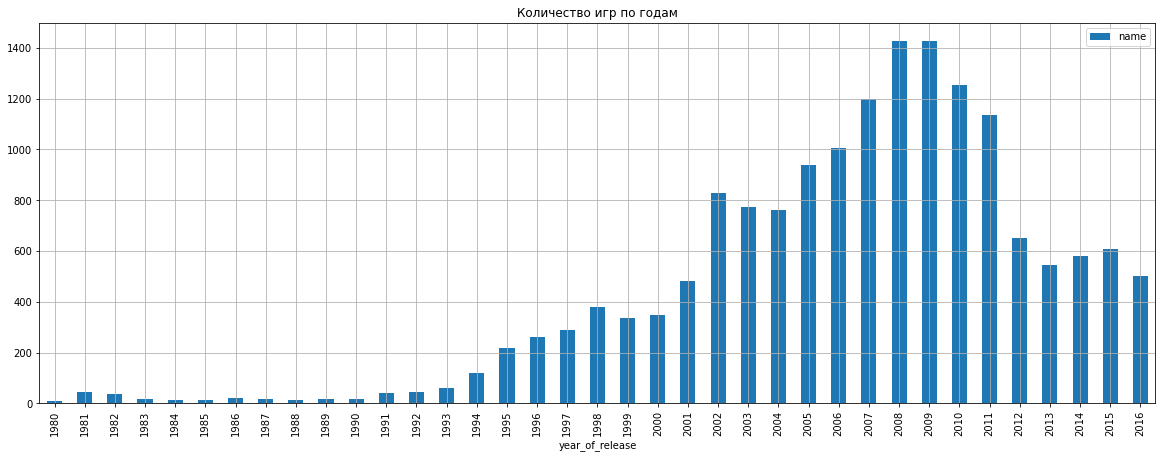

In [9]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

(games
 .pivot_table(index =["year_of_release"], values = ['name'], aggfunc = 'count')
 .plot(kind = 'bar', grid = True, title='Количество игр по годам',  figsize=(20, 7)))

<font color = 'green'>
    Вывод: количество произведенных игр начинает расти с 1991 - 1995 годов.
</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

In [10]:
platforms_by_year = (games.pivot_table(index =["year_of_release", "platform"], values = ['total_sales'], aggfunc = 'sum')
.rename(columns={'year_of_release': 'year', 'total_sales': 'sales'})
.query('year_of_release > 0')
.reset_index()
)

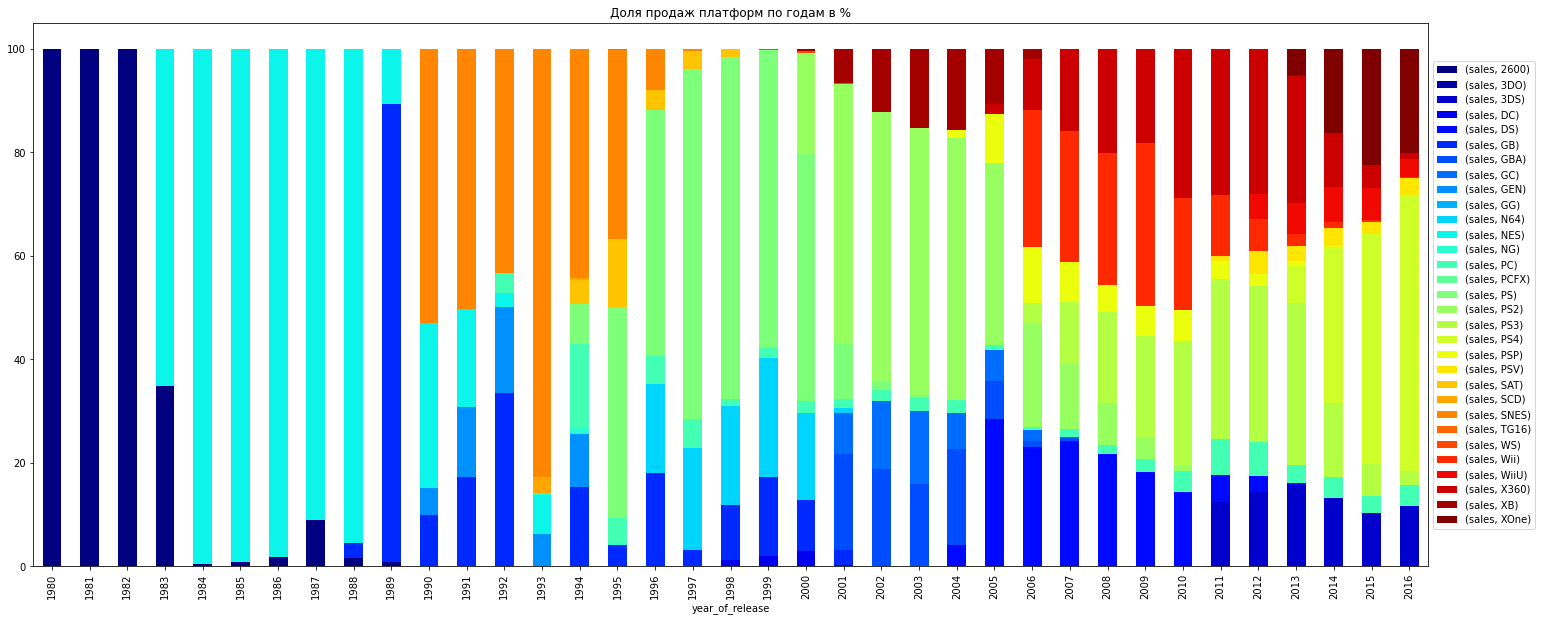

In [11]:
(platforms_by_year.groupby(['year_of_release', 'platform'])
 .sum().groupby(level=0)
 .apply(lambda x: 100 * x / x.sum())
 .unstack()
 .plot(kind='bar', stacked=True, figsize=(25, 10), colormap="jet", title = 'Доля продаж платформ по годам в %')
 .legend(loc='center left', bbox_to_anchor=(1, 0.5)))

<AxesSubplot:title={'center':'Абсолютные продажи платформ по годам в млн долларов'}, xlabel='year_of_release'>

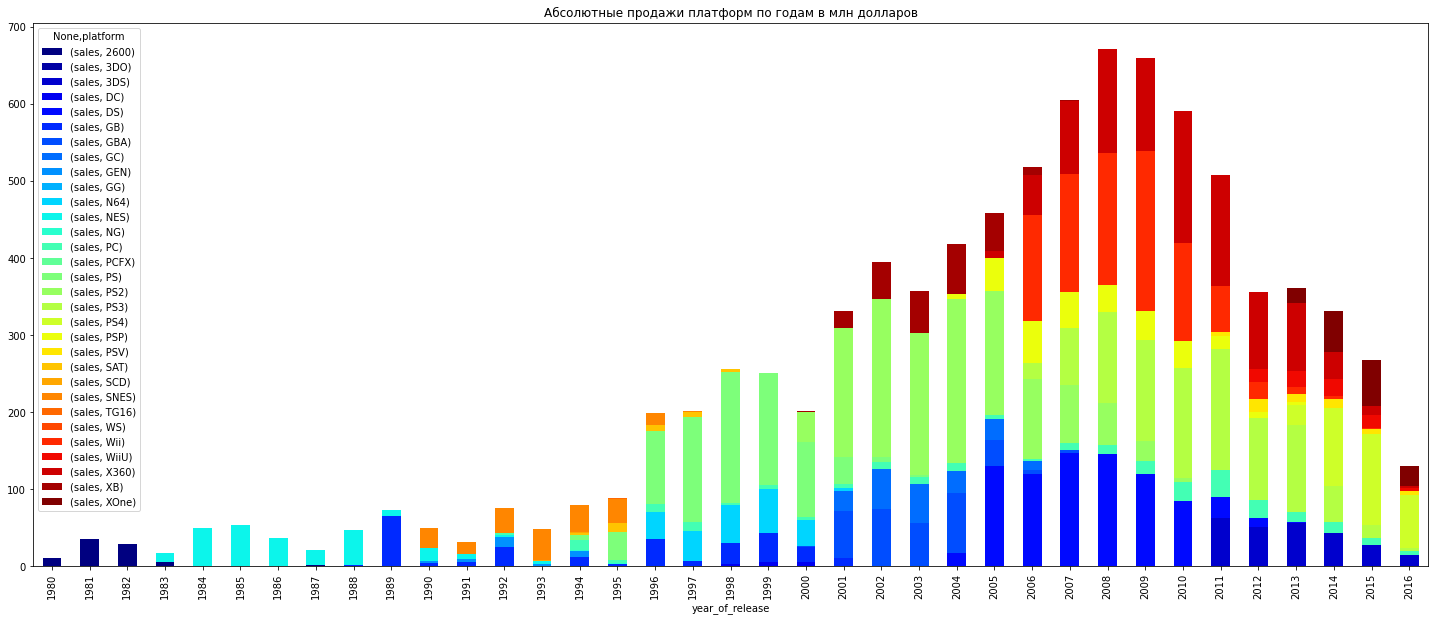

In [12]:
(platforms_by_year
 .groupby(['year_of_release', 'platform'])
 .sum()
 .unstack()
 .plot(kind='bar', stacked=True, figsize=(25, 10), colormap="jet", title = 'Абсолютные продажи платформ по годам в млн долларов'))

In [13]:
# топ 10 платформ по продажам за все время:
(
 games.pivot_table(index =["platform"], values = ['total_sales'], aggfunc = 'sum')
.rename(columns={'year_of_release': 'year', 'total_sales': 'sales'})
.sort_values(by=['sales'], ascending=False)
.head(10)
)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<font color = 'green'>
    Топ 10 платформ по продажам за все время: PS2, X360, PS3, Wii, DS, PS, PS4, GBA , PSP, 3DS
</font>

<AxesSubplot:title={'center':'Абсолютные продажи ТОП-10 платформ по годам в млн долларов'}, xlabel='year_of_release'>

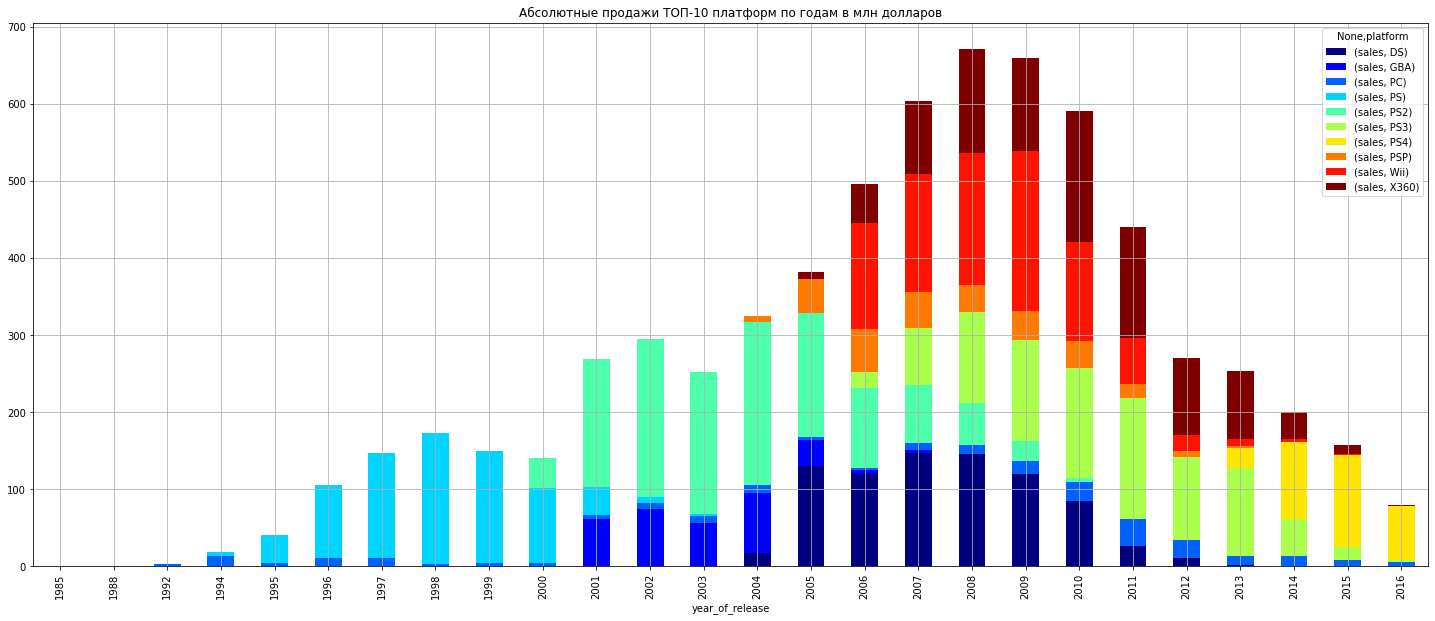

In [14]:
(platforms_by_year
 .query(('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PS" or platform == "GBA" or platform == "PS4" or platform == "PSP" or platform == "PC"'))
 .groupby(['year_of_release', 'platform'])
 .sum()
 .unstack()
 .plot(kind='bar', stacked=True, figsize=(25, 10), colormap="jet", grid=True, title = 'Абсолютные продажи ТОП-10 платформ по годам в млн долларов')
)

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


<font color = 'green'>
    Новые платформы появляются примерно раз в пять лет.
    Время жизни платформ довольно разное. Если телевизионные приставки "живут" примерно 8-10 лет, а затем поколение меняется и продажи окончательно сходят на нет, то PC (компьютеры) присутствуют всегда с небольшой долей.
Век портативных консолей GBA (GameBoyAdvanced, PSP, PSVita) не долог. Думаю тут свое влияние оказывает выход смартфонов, а также пиратство.
</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Жизненный цикл определен верно.
</div>


# Комментарий от наставника

Всё верно,PC бояре как всегда впереди планеты всей)


Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


In [15]:
platforms_by_year

,year_of_release,platform,sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52


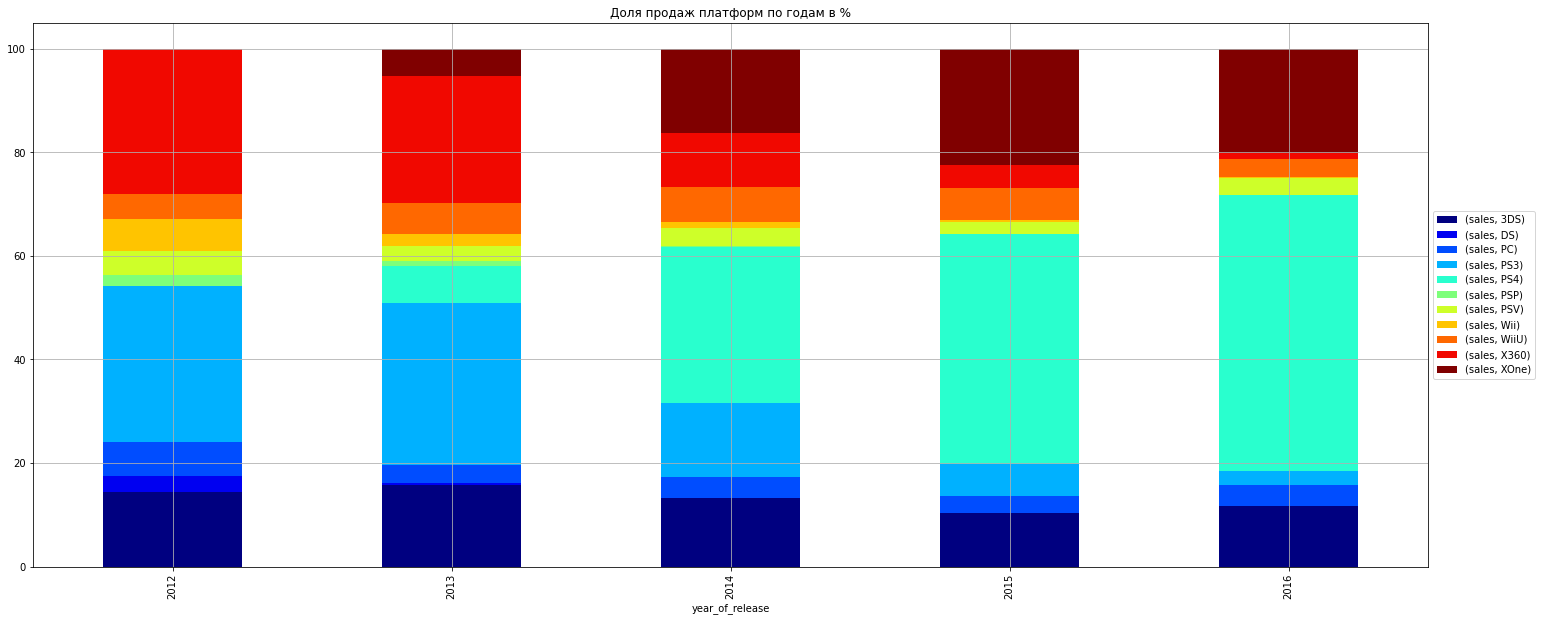

In [16]:
(platforms_by_year
 .query('year_of_release>=2012')
 .groupby(['year_of_release', 'platform'])
 .sum().groupby(level=0)
 .apply(lambda x: 100 * x / x.sum())
 .unstack()
 .plot(kind='bar', stacked=True, figsize=(25, 10), colormap="jet", title = 'Доля продаж платформ по годам в %', grid=True)
 .legend(loc='center left', bbox_to_anchor=(1, 0.5))
)

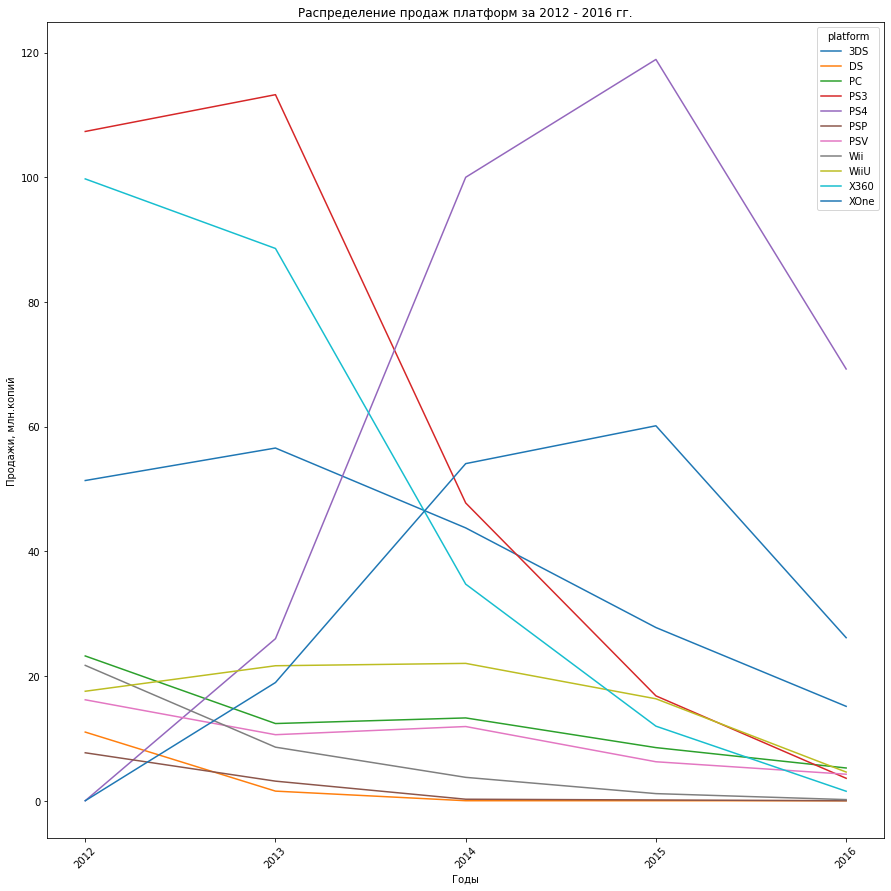

In [17]:
data_sales = platforms_by_year.query('year_of_release >= 2012').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'sales', 
    aggfunc = 'sum'
    ).fillna(0)
ax = data_sales.plot(xticks=data_sales.index,figsize=(15,15))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2012 - 2016 гг.')

plt.show()   

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<font color = 'green'>
    Наиболее переспективные платформы с точки зрения продаж на 2017 год это PS4, XOne, 3DS. Остальные платформы с не большой долей.
</font>

In [18]:
games_actual = games.query('year_of_release > 2012')

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

In [19]:
games_actual_platform = (games
.platform.value_counts()
.sort_values(ascending = False)
.head(10)
.index.values
               )

In [20]:
platforms_by_year

,year_of_release,platform,sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52


Text(0.5, 1.0, 'Продажи всех игр по ТОП 10 платформам')

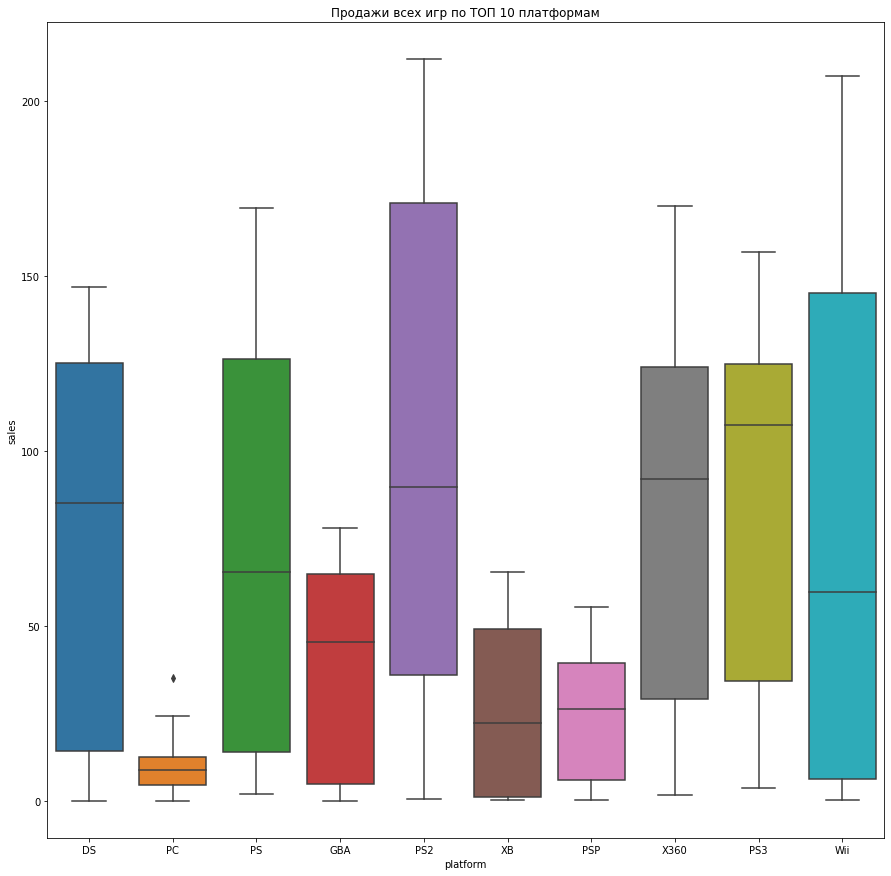

In [21]:
games_actual_platform = (games
.platform.value_counts()
.sort_values(ascending = False)
.head(10)
.index.values
               )

fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(y='sales',
            x="platform",
            data=platforms_by_year[platforms_by_year.platform.isin(games_actual_platform)],
            orient="v", ax=ax).set_title("Продажи всех игр по ТОП 10 платформам")


In [22]:
top_games = games.query('year_of_release >= 2012 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]')
top_games.head(5)

top_games.user_score

16       8.2
23       8.1
31       0.0
33       0.0
34       5.3
        ... 
16672    0.0
16674    0.0
16677    0.0
16691    0.0
16710    0.0
Name: user_score, Length: 1966, dtype: float64

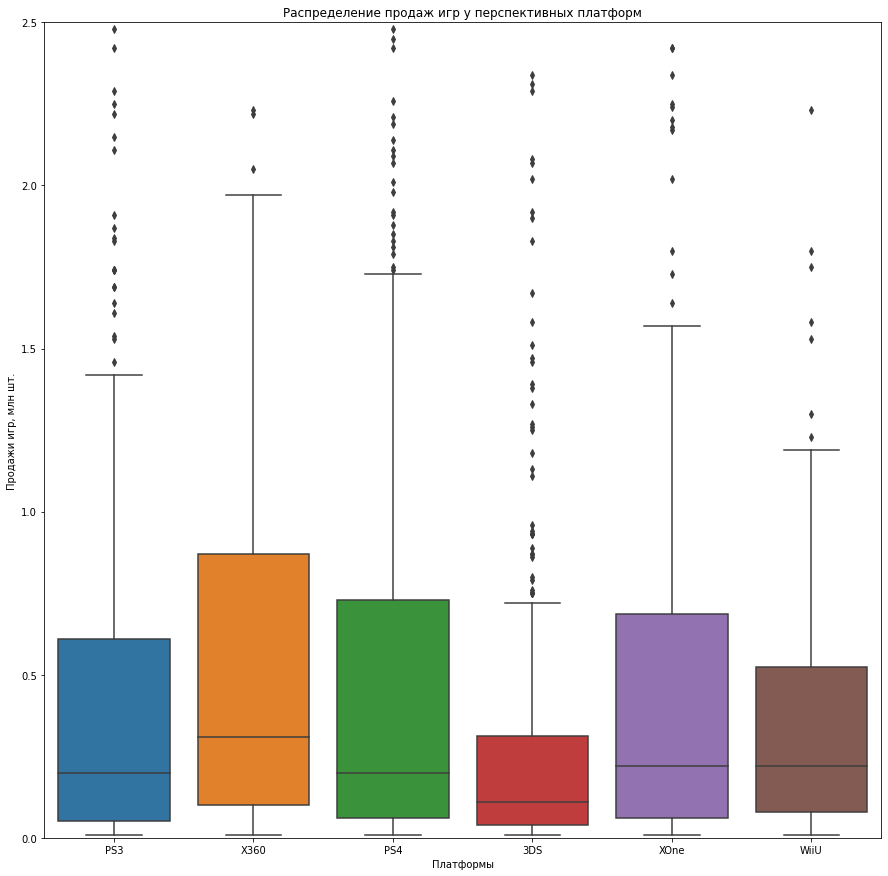

In [23]:
plt.figure(figsize=(15,15))

ax = sns.boxplot(x='platform', y='total_sales', data=top_games)

ax.set_ylim(0, 2.5)

ax.set_ylabel('Продажи игр, млн шт.')

ax.set_xlabel('Платформы')

ax.set_title('Распределение продаж игр у перспективных платформ')

plt.show()

<font color = 'green'> Медианны смещенны к нижней части коробки - значит выходит большое кол-во игр с небольшим кол-вом продаж. Также, на всех платформах есть бестселлеры (см. таблицу выше - скорее всего это межплатформенные игры, которые выпускаются сериями - вроде колл оф дути, ГТА) </font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>


# Комментарий от наставника

Боксплот тут подходит идеально

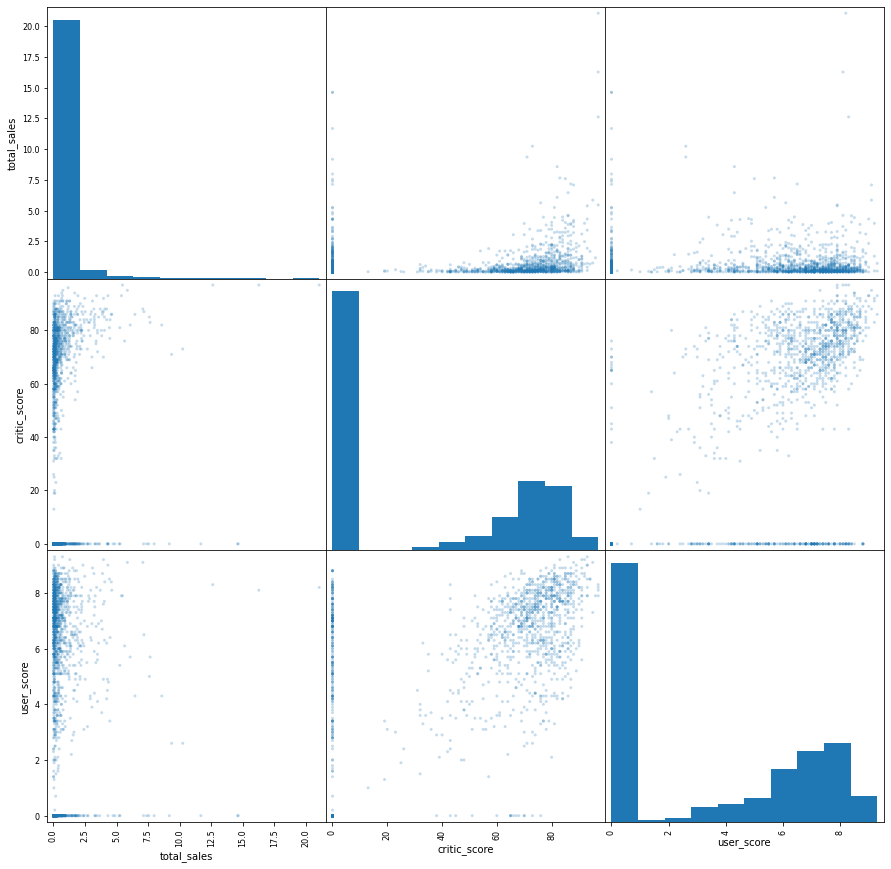

In [24]:
corr_matrix_games = games_actual[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(corr_matrix_games, figsize=(15,15), alpha=0.25, grid=True)

corr_matrix_games_corr = pd.DataFrame(corr_matrix_games.corr()['total_sales'])

In [25]:
corr_matrix_games_corr = pd.DataFrame(corr_matrix_games.corr()['total_sales'])
corr_matrix_games_corr

,total_sales
total_sales,1.000000
critic_score,0.221094
user_score,0.152945


<font color = 'green'>
    Корреляция между оценками пользователей/критиков и продажами очень слабая.
</font>

Платформа: PS4
-0.03362497596528878
0.40589480145836687


,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


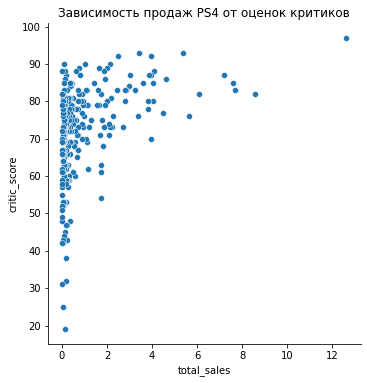

Платформа: XOne
-0.09400318326920852
0.4104220356129637


,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


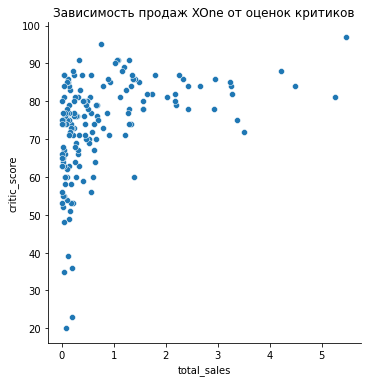

Платформа: PS3
0.0014250955948666977
0.33372581120725897


,total_sales,user_score,critic_score
total_sales,1.000000,0.001425,0.333726
user_score,0.001425,1.000000,0.544510
critic_score,0.333726,0.544510,1.000000


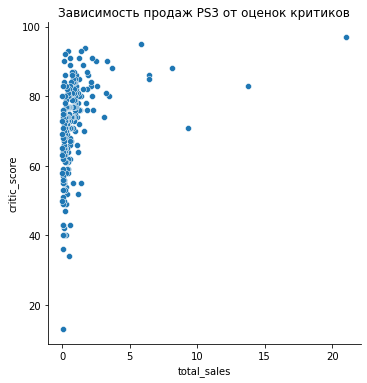

Платформа: X360
-0.0020140394826897853
0.36057348885073365


,total_sales,user_score,critic_score
total_sales,1.000000,-0.002014,0.360573
user_score,-0.002014,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


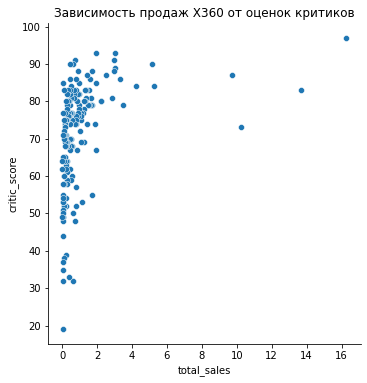

Платформа: WiiU
0.3918479505297129
0.35088242248864304


,total_sales,user_score,critic_score
total_sales,1.000000,0.391848,0.350882
user_score,0.391848,1.000000,0.770080
critic_score,0.350882,0.770080,1.000000


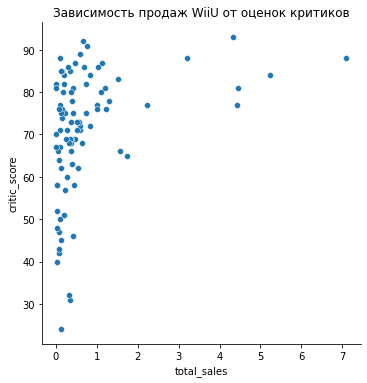

Платформа: 3DS
0.2018125500765528
0.31055301915326294


,total_sales,user_score,critic_score
total_sales,1.000000,0.201813,0.310553
user_score,0.201813,1.000000,0.722762
critic_score,0.310553,0.722762,1.000000


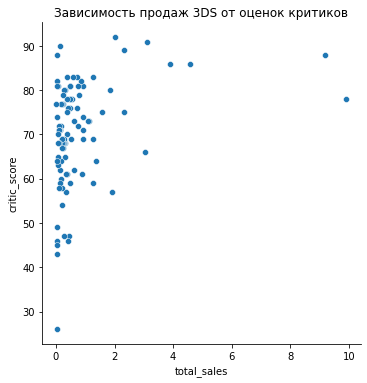

In [26]:

for pltfrm in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]:
    print('Платформа: ' + pltfrm)
    print(top_games.query('platform == @pltfrm')['total_sales'].corr(top_games.query('platform == @pltfrm & total_sales > 0& user_score > 0 &critic_score >0')['user_score']))
    print(top_games.query('platform == @pltfrm')['total_sales'].corr(top_games.query('platform == @pltfrm & total_sales > 0& user_score > 0 &critic_score >0')['critic_score']))
    display(top_games.query('platform == @pltfrm & total_sales > 0 & user_score > 0 &critic_score >0')[['total_sales','user_score', 'critic_score']].agg('corr'))
    sns.relplot(x='total_sales', y='critic_score',data=top_games.query('platform == @pltfrm & total_sales > 0 & user_score > 0 &critic_score >0'))
    plt.title('Зависимость продаж' +' '+ pltfrm + ' '+ 'от оценок критиков')
    plt.show()

<font color = 'green'> В целом, отзывы слабо коррелируют с продажами. Мнение критиков больше коррелирует с продажами, чем мнение пользователей, кроме платформы WiiU - Там наоборот, мнение пользователей важно для продаж </font>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> Не понимаю, что нужно фильтровать и о каких заглушках идет речь. Выше фильтровал года. Что нужно отфильитррвать тут? total_sales и user_scores, critic_scores > 0? Сделал так - см. цикл </b>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 
Речь шла вот об этих заглушках : `games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)`
    
Теперь выбросов нет. Благодарю.
</div>

Text(0.5, 1.0, 'Тепловая карта продаж по платформам и жанрам')

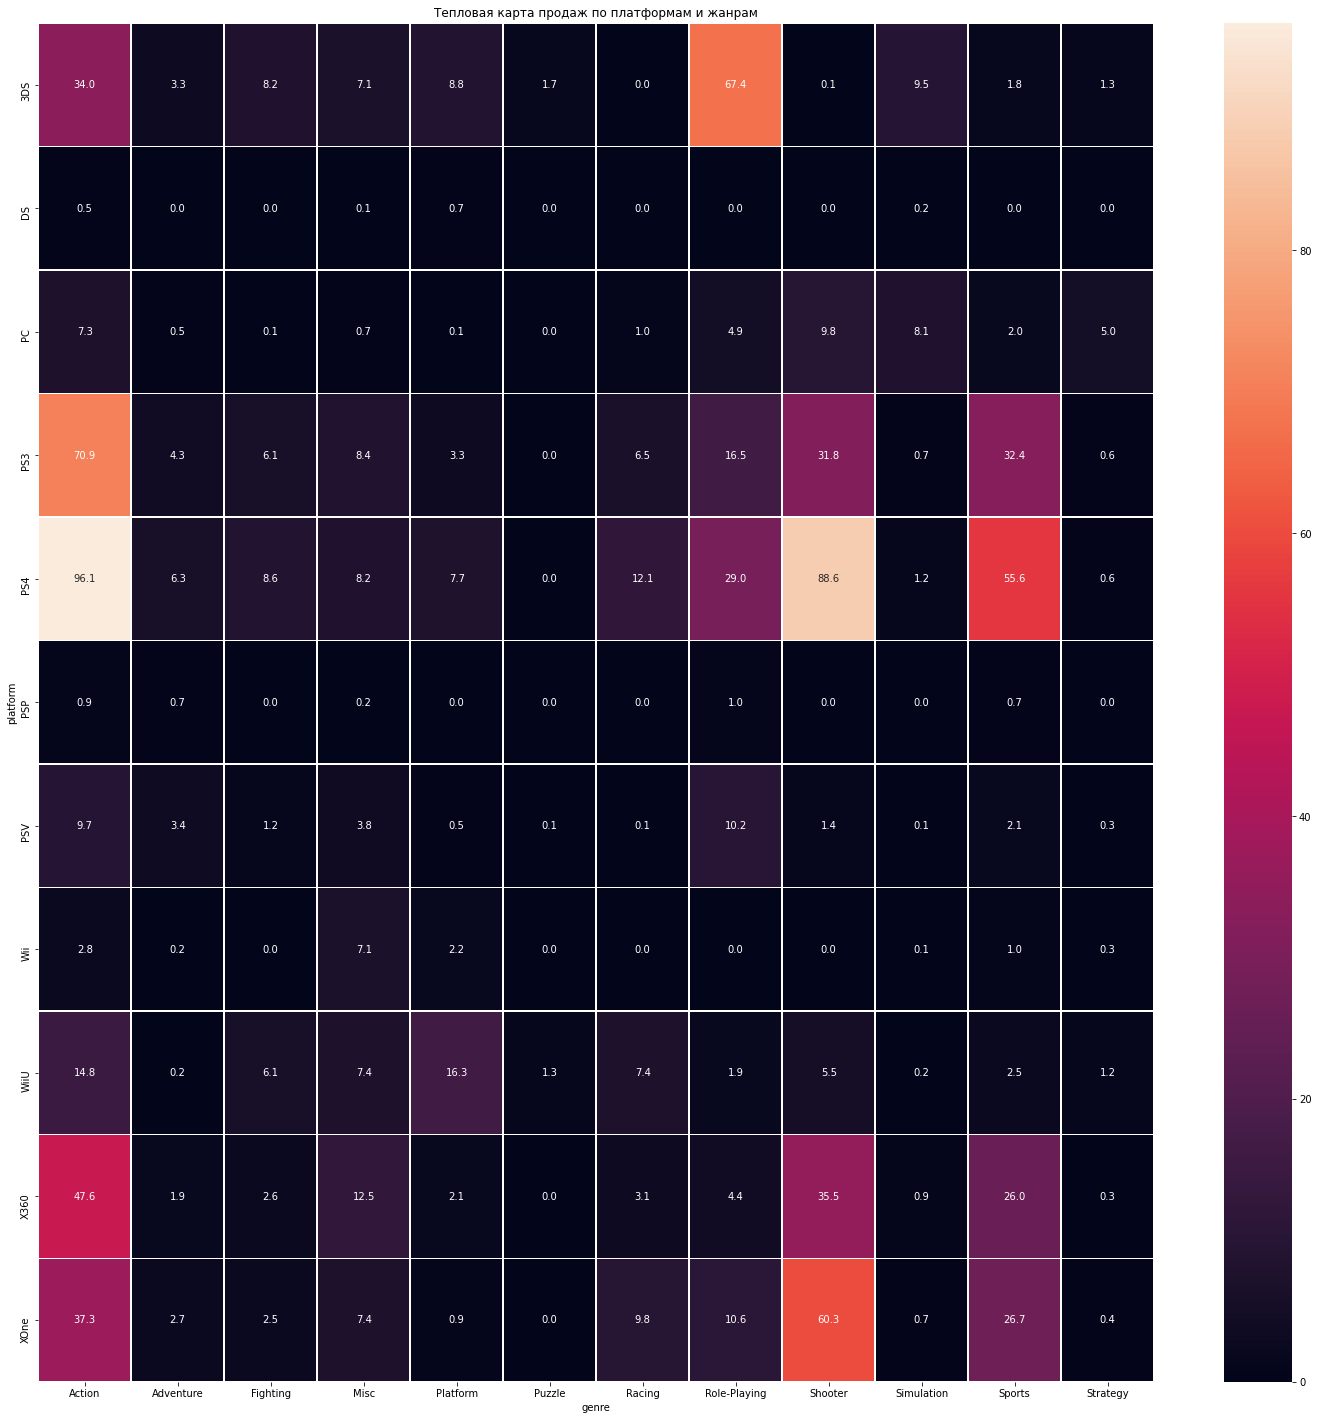

In [27]:
genre_sales_by_platform = games_actual.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(genre_sales_by_platform, annot=True, fmt=".1f", linewidths=.5, ax=ax).set_title("Тепловая карта продаж по платформам и жанрам")


In [28]:
(games_actual
 .pivot_table(columns='genre', values='total_sales', aggfunc=sum)
 .stack()
 .reset_index()
 .rename(columns={'level_0': 'total_sales', 0: 'revenue'})
 .sort_values(by=['revenue'], ascending=False)
)

,total_sales,genre,revenue
0,total_sales,Action,321.87
8,total_sales,Shooter,232.98
10,total_sales,Sports,150.65
7,total_sales,Role-Playing,145.89
3,total_sales,Misc,62.82
4,total_sales,Platform,42.63
6,total_sales,Racing,39.89
2,total_sales,Fighting,35.31
1,total_sales,Adventure,23.64
9,total_sales,Simulation,21.76


<font color = 'green'>
    Топ 5 жанров по продажам c 1995 года - Action, Sports, Shooter, Role-Playing, Misc.
    Если рассматривать актуальное поколение консолей, то ТОП 3 жанров выглядит следующим образом:
    $PS4 - Action (96 mln.), Shooter (88 mln.), Sport (55 mln.). 
    XOne - Shooter (60 mln.), Action (37 mln.), Sport (26 mln.). 
    3DS - Role-Playing (84 mln.), Action (57 mln.), Platform (32 mln.)$.
</font>

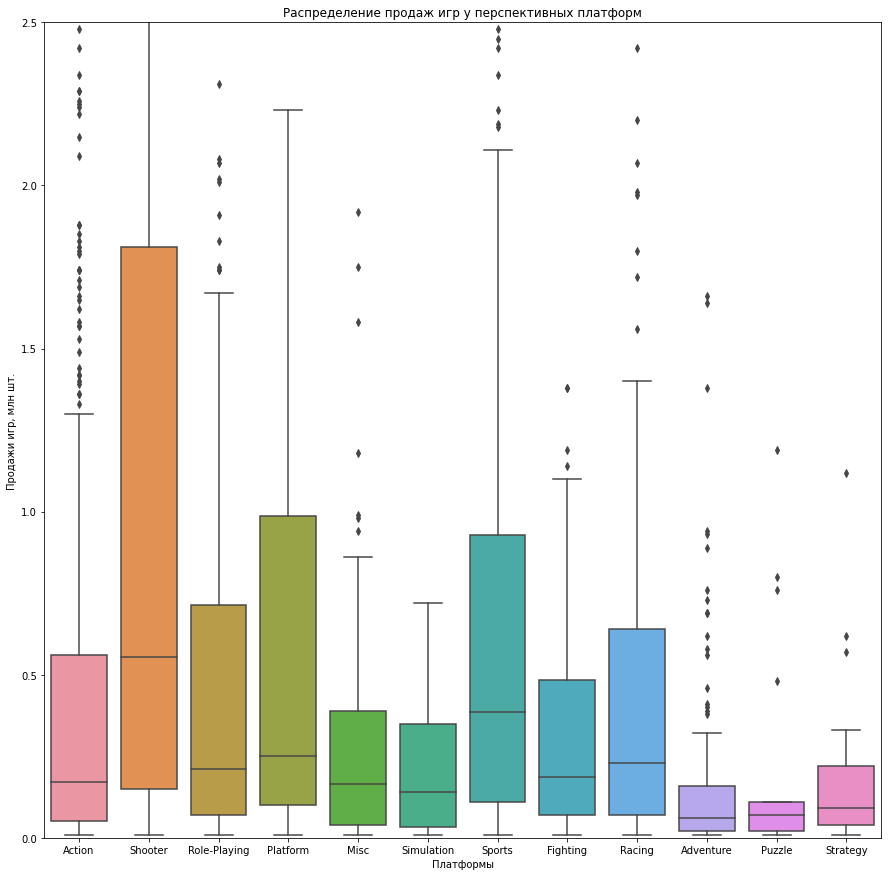

In [29]:
plt.figure(figsize=(15,15))

ax = sns.boxplot(x='genre', y='total_sales', data=top_games)

ax.set_ylim(0, 2.5)

ax.set_ylabel('Продажи игр, млн шт.')

ax.set_xlabel('Платформы')

ax.set_title('Распределение продаж игр у перспективных платформ')

plt.show()

In [30]:
top_games.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
All,194.61,288.78,314.14,82.19,236.54,159.32,1275.58
Action,45.49,115.75,96.10,19.07,81.60,37.31,395.32
Shooter,0.13,60.39,88.56,6.01,72.70,60.33,288.12
Sports,4.23,44.83,55.61,3.16,36.39,26.74,170.96
Role-Playing,79.30,22.62,28.99,2.89,9.80,10.55,154.15
Misc,9.45,8.88,8.19,12.46,14.83,7.43,61.24
Platform,19.11,4.26,7.69,21.53,2.14,0.93,55.66
Racing,0.28,11.56,12.14,7.87,8.41,9.79,50.05
Fighting,8.46,11.00,8.65,6.27,4.97,2.45,41.80


In [31]:
top_games.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='mean',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
Shooter,0.065000,1.207800,2.160000,0.601000,1.483673,1.587632,1.516421
Sports,0.352500,0.723065,1.208913,0.395000,0.827045,0.703684,0.814095
Platform,1.005789,0.387273,0.640833,1.266471,0.356667,0.186000,0.795143
Role-Playing,1.003797,0.370820,0.568431,0.412857,0.700000,0.753571,0.682080
All,0.491439,0.586951,0.801378,0.559116,0.810068,0.645020,0.648820
Racing,0.280000,0.550476,0.638947,2.623333,0.400476,0.489500,0.588824
Action,0.291603,0.680882,0.667361,0.297969,0.800000,0.438941,0.548294
Simulation,0.996500,0.161818,0.205000,0.200000,0.191250,0.172500,0.507200
Fighting,0.940000,0.333333,0.480556,1.254000,0.310625,0.350000,0.475000


In [32]:
top_games.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='median',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
Shooter,0.065,0.385,0.970,0.120,0.470,1.095,0.555
Sports,0.205,0.365,0.525,0.365,0.465,0.335,0.385
Platform,0.210,0.250,0.300,0.580,0.110,0.160,0.250
Racing,0.280,0.170,0.230,0.510,0.230,0.185,0.230
Role-Playing,0.220,0.160,0.200,0.410,0.490,0.320,0.210
All,0.110,0.200,0.200,0.220,0.310,0.220,0.190
Fighting,0.080,0.190,0.170,0.190,0.225,0.200,0.185
Action,0.090,0.260,0.155,0.150,0.335,0.150,0.170
Misc,0.110,0.075,0.075,0.215,0.270,0.180,0.165


<font color = 'green'> Медианные продажи "в целом" больше всего в жанре Shooter, Sports, Platform (особенно за счет WiiU)
Наименнее популярные жанры Adventure, Puzzle, Strategy
</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Совершенно верно.
</div>


# Комментарий от наставника

Отлично, мне очень нравится визуализация и промежуточные выводы.


# Шаг 4. Составьте портрет пользователя каждого региона

In [33]:

# продажи по регионам и платформам (начиная с 1995 года)

sales_by_regions = (games_actual
.pivot_table(columns=['platform'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum)
.unstack()
.reset_index()
.rename(columns={'level_1': 'sales_region', 0: 'revenue'})
)

# продажи по регионам и жанрам (начиная с 1995 года)

sales_by_genres = (games_actual
.pivot_table(columns=['genre'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum)
.unstack()
.reset_index()
.rename(columns={'level_1': 'sales_region', 0: 'revenue'})
)

In [34]:

# ТОП 5 продажи по платформе и региону Европа (начиная с 1995 года)

sales_by_regions_eu = (sales_by_regions
.query('sales_region == "eu_sales"')
.sort_values(by=['revenue'], ascending=False)                       
.head(5)
)

# ТОП 5 продажи по платформе и региону Сев. Америка (начиная с 1995 года)

sales_by_regions_na = (sales_by_regions
.query('sales_region == "na_sales"')
.sort_values(by=['revenue'], ascending=False)                       
.head(5)
)

# ТОП 5 продажи по платформе и региону Япония (начиная с 1995 года)

sales_by_regions_jp = (sales_by_regions
.query('sales_region == "jp_sales"')
.sort_values(by=['revenue'], ascending=False)
.head(5)
)

# Доля  в продажах по региону и платфоме (начиная с 1995 года)

sales_by_regions_eu['share %'] = sales_by_regions_eu['revenue']/sales_by_regions_eu['revenue'].sum()
sales_by_regions_na['share %'] = sales_by_regions_na['revenue']/sales_by_regions_na['revenue'].sum()
sales_by_regions_jp['share %'] = sales_by_regions_jp['revenue']/sales_by_regions_jp['revenue'].sum()

# ТОП 5 продажи по платформе и региону Европа (начиная с 1995 года)
sales_by_regions_eu

,platform,sales_region,revenue,share %
12,PS4,eu_sales,141.09,0.422463
9,PS3,eu_sales,67.81,0.203042
30,XOne,eu_sales,51.59,0.154475
27,X360,eu_sales,42.52,0.127317
0,3DS,eu_sales,30.96,0.092703


In [35]:
# ТОП 5 продажи по платформе и региону Сев. Америка (начиная с 1995 года)

sales_by_regions_na

,platform,sales_region,revenue,share %
14,PS4,na_sales,108.74,0.282280
32,XOne,na_sales,93.12,0.241732
29,X360,na_sales,81.66,0.211983
11,PS3,na_sales,63.50,0.164841
2,3DS,na_sales,38.20,0.099164


In [36]:
# ТОП 5 продажи по платформе и региону Япония (начиная с 1995 года)

sales_by_regions_jp

,platform,sales_region,revenue,share %
1,3DS,jp_sales,67.81,0.496449
10,PS3,jp_sales,23.35,0.170950
19,PSV,jp_sales,18.59,0.136101
13,PS4,jp_sales,15.96,0.116846
25,WiiU,jp_sales,10.88,0.079654


<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
📝 
Расчеты верны, но не забудь перепроверить изменения после корректироввки актуального периода. Не хватает выводов.
</div>

In [37]:
# ТОП 5 продажи по жанрам и региону Европа (начиная с 1995 года)

sales_by_genres_eu = (sales_by_genres
.query('sales_region == "eu_sales"')
.sort_values(by=['revenue'], ascending=False)                       
.head(5)
)

# ТОП 5 продажи по жанрам и региону Сев. Америка (начиная с 1995 года)

sales_by_genres_na = (sales_by_genres
.query('sales_region == "na_sales"')
.sort_values(by=['revenue'], ascending=False)                       
.head(5)
)

# ТОП 5 продажи по жанрам и региону Япония (начиная с 1995 года)

sales_by_genres_jp = (sales_by_genres
.query('sales_region == "jp_sales"')
.sort_values(by=['revenue'], ascending=False)
.head(5)
)

# Доля  в продажах по жанрам и платфоме (начиная с 1995 года)

sales_by_genres_eu['share %'] = sales_by_genres_eu['revenue']/sales_by_genres_eu['revenue'].sum()
sales_by_genres_na['share %'] = sales_by_genres_na['revenue']/sales_by_genres_na['revenue'].sum()
sales_by_genres_jp['share %'] = sales_by_genres_jp['revenue']/sales_by_genres_jp['revenue'].sum()

# ТОП 5 продажи по платформе и жанрам Европа (начиная с 1995 года)
sales_by_genres_eu

,genre,sales_region,revenue,share %
0,Action,eu_sales,118.13,0.364970
24,Shooter,eu_sales,87.86,0.271449
30,Sports,eu_sales,60.52,0.186981
21,Role-Playing,eu_sales,36.97,0.114221
18,Racing,eu_sales,20.19,0.062378


In [38]:
# ТОП 5 продажи по платформе и жанрам Сев. Америка (начиная с 1995 года)

sales_by_genres_na

,genre,sales_region,revenue,share %
2,Action,na_sales,126.05,0.336178
26,Shooter,na_sales,109.74,0.292679
32,Sports,na_sales,65.27,0.174077
23,Role-Playing,na_sales,46.40,0.123750
11,Misc,na_sales,27.49,0.073316


In [39]:
top_games.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,9.7%,57.0%,10.3%
PS3,24.2%,22.9%,19.2%
PS4,31.9%,10.4%,20.2%
WiiU,5.7%,8.5%,7.1%
X360,16.9%,1.0%,26.0%
XOne,11.7%,0.2%,17.3%


Самые популярные платформы

<font color = 'green'> На европейском рынке доминирует PS - суммарно 56%.
На рынке Японии в лидерах 3DS - более 57%
В США предпочитают Микрософт - 43% у Икс Бокс, 39.4% у PlayStaton</font>

In [40]:
top_games.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,32.4%,27.3%,30.3%
Adventure,1.8%,2.8%,1.5%
Fighting,2.3%,5.5%,3.5%
Misc,4.1%,5.9%,5.3%
Platform,4.3%,5.6%,4.3%
Puzzle,0.3%,0.9%,0.2%
Racing,5.7%,1.6%,3.1%
Role-Playing,8.8%,32.7%,9.8%
Shooter,23.7%,5.9%,25.8%


Самые популярные жанры

<font color = 'green'> На европейском рынке доминирют Action, Shooter, Sports - суммарно 70% рынка
На рынке Японии в лидерах Role-Playing и Action - 60% рынка на двоих.
В США предпочитают Action, Shooter, Sports - суммарно 70% рынка. Рынок похож в этом смысле на европейский</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

In [41]:
# ТОП 5 продажи по платформе и жанрам Япония (начиная с 1995 года)

sales_by_genres_jp

,genre,sales_region,revenue,share %
22,Role-Playing,jp_sales,51.04,0.443865
1,Action,jp_sales,40.49,0.352118
10,Misc,jp_sales,9.20,0.080007
7,Fighting,jp_sales,7.65,0.066528
25,Shooter,jp_sales,6.61,0.057483


<AxesSubplot:title={'center':'Рейтинг и продажи по регионам'}, xlabel='rating'>

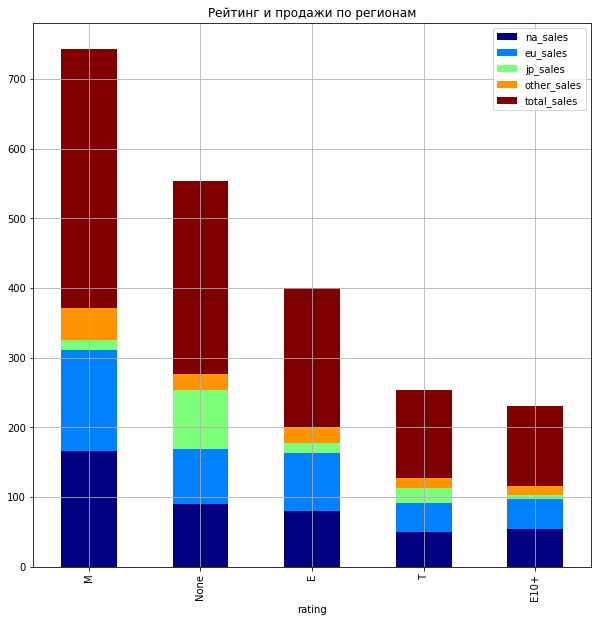

In [42]:
sales_by_rating = games_actual[[x for x in games_actual.columns if 'sales' in x] + ['rating']]
(sales_by_rating
 .groupby('rating')
 .sum()
 .sort_values(by=['total_sales'], ascending=False)
 .plot(kind='bar', stacked=True, figsize=(10, 10), colormap="jet", grid=True, title = 'Рейтинг и продажи по регионам')
)

In [43]:
top_games.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,23.1%,17.3%,20.2%
E10+,9.6%,4.9%,11.1%
M,39.4%,12.5%,40.1%
None,18.2%,52.3%,17.8%
T,9.8%,13.0%,10.8%


Влияет ли рейтинг ESRB на продажи в отдельном регионе?


<font color = 'green'>52% проданных игр в Японии - вообще без рейтинга. В Европе и США 40% рынка занимают игры категории M

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Верно.
</div>

# Шаг 5. Проверьте гипотезы

In [44]:
top_games.query('platform == "XOne"& year_of_release >= 2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,None,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,0.0,0.0,None,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,None,0.01


In [45]:
# Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
'''
Ho: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H1: Cредние пользовательские рейтинги платформ Xbox One и PC различаются
''' 

xone = games.query('platform == "XOne"& year_of_release >= 2012').user_score.dropna().reset_index(drop=True)
pc = games.query('platform == "PC"& year_of_release >= 2012').user_score.dropna().reset_index(drop=True)

#Уровень значимости 5%:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.06811033795099536
Не получилось отвергнуть нулевую гипотезу


In [46]:
results.pvalue  < alpha

False

<font color = 'green'>
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC одинаковые.
</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 
Да, теперь все верно.
</div>

In [47]:
# Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

'''
Ho: Cредние пользовательские рейтинги жанров Action и Sports одинаковые;
H1: Cредние пользовательские рейтинги жанров Action и Sports различаются
''' 
action = games.query('genre == "Action"& year_of_release >= 2012').user_score.dropna().reset_index(drop=True)
sports = games.query('genre == "Sports"& year_of_release >= 2012').user_score.dropna().reset_index(drop=True)

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение scientific notation: ', float(results.pvalue))
print('p-значение в decimal notation: '"{:.9f}".format(float(results.pvalue)))# тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение scientific notation:  0.015524300151704164
p-значение в decimal notation: 0.015524300
Отвергаем нулевую гипотезу


<font color = 'green'>
Разница средних значений пользовательских рейтингов жанров Action и Sports статистически значима: средние оценки отличаются в жанрах Action и Sports
</font>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
* Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.

* Хорошо, что использован параметр отфильтровывющий пропуски. 
    
* Правильно, что показаны средние пользовательские рейтинги.  Это позволяет нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.
</div>

# Выводы

-  Количество произведенных игр начинает расти с 1991 года.

-  Топ 10 платформ по продажам за все время: PS2, X360, PS3, Wii, DS, PS, PS4, GBA , PSP, 3DS

-  Наиболее переспективные платформы с точки зрения продаж на 2017 год это PS4, XOne, 3DS. Остальные платформы с не большой долей. Медианны смещенны к нижней части коробки - значит выходит большое кол-во игр с небольшим кол-вом продаж. Также, на всех платформах есть бестселлеры (см. таблицу выше - скорее всего это межплатформенные игры, которые выпускаются сериями - вроде колл оф дути, ГТА)

-   Новые платформы появляются примерно раз в пять лет.
    Время жизни платформ довольно разное. Если телевизионные приставки "живут" примерно 8-10 лет, а затем поколение меняется и продажи окончательно сходят на нет, то PC (компьютеры) присутствуют всегда с небольшой долей.
    Век портативных консолей GBA (GameBoyAdvanced, PSP, PSVita) не долог. Думаю тут свое влияние оказывает выход смартфонов, а также пиратство.
    
- В целом, отзывы слабо коррелируют с продажами. Мнение критиков больше коррелирует с продажами, чем мнение пользователей, кроме платформы WiiU - Там наоборот, мнение пользователей важно для продаж

- Медианные продажи "в целом" больше всего в жанре Shooter, Sports, Platform (особенно за счет WiiU)
Наименнее популярные жанры Adventure, Puzzle, Strategy

- На европейском рынке доминирют Action, Shooter, Sports - суммарно 70% рынка На рынке Японии в лидерах Role-Playing и Action - 60% рынка на двоих. В США предпочитают Action, Shooter, Sports - суммарно 70% рынка. Рынок похож в этом смысле на европейский.

- На европейском рынке доминирует PS - суммарно 56%. На рынке Японии в лидерах 3DS - более 57% В США предпочитают Микрософт - 43% у Икс Бокс, 39.4% у PlayStaton

- 52% проданных игр в Японии - вообще без рейтинга. В Европе и США 40% рынка занимают игры категории M

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

- Разница средних значений пользовательских рейтингов статистически незначимо: средние пользовательские рейтинги Xbox One и PC одинаковые.
- Разница средних значений пользовательских рейтингов жанров Action и Sports статистически значима: средние оценки отличаются в жанрах Action и Sports




<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Выводы понятны и логичны, но не забудь, пожалуйста перепроверить их после корректировок.
    
Ты очень серьезно подходишь к визуализации.

Вот пара ссылок на полезные источники:https://habr.com/ru/company/otus/blog/540526/, https://pythonru.com/biblioteki/seaborn-plot
</div>